In [120]:
# Load Dataset

In [121]:
## Download dataset from kaggle

In [122]:
# # upload kaggle.json
# ! cp kaggle.json ~/.kaggle/
# ! kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset
# ! unzip ibm-hr-analytics-attrition-dataset

In [123]:
## Import Libraries

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import mercury as mr
import warnings
warnings.filterwarnings('ignore')

In [125]:
# Create Mercury App
show_code = mr.Checkbox(label="Show code", value=False)
app = mr.App(title="DSBDA", description="Mini Project",show_code=show_code.value)

mercury.Checkbox

mercury.App

In [126]:
## Load csv file into dataframe

# Dataset at glance

In [127]:
employee_df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Dataset info

In [128]:
print(f'Dataset has {employee_df.shape[0]} rows and {employee_df.shape[1]} columns')

Dataset has 1470 rows and 35 columns


In [129]:
# Seperating column types
all_cols=employee_df.columns
numerical_columns=employee_df.select_dtypes(include=['int64']).columns
categorical_columns=employee_df.select_dtypes(include=['object']).columns

In [130]:
print(f'Dataset contains following columns:')
print('----------------------------------------------------------------------------------------------------')
print('Numerical columns:')
i=0
for c in numerical_columns:
    i+=1
    print(c,end=', ')
    if i%5==0:
        print()
print()
print('----------------------------------------------------------------------------------------------------')
print(f'Categorical columns:')
i=0
for c in categorical_columns:
    i+=1
    print(c,end=', ')
    if i%5==0:
        print()

Dataset contains following columns:
----------------------------------------------------------------------------------------------------
Numerical columns:
Age, DailyRate, DistanceFromHome, Education, EmployeeCount, 
EmployeeNumber, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, 
JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, 
PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, 
TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, 
YearsWithCurrManager, 
----------------------------------------------------------------------------------------------------
Categorical columns:
Attrition, BusinessTravel, Department, EducationField, Gender, 
JobRole, MaritalStatus, Over18, OverTime, 

# Data cleaning

## Checking Null Values

In [131]:
# check null values
if any(employee_df.isnull().any()):
    print('Null values present')
else:
    print('No null values found')

No null values found


In [132]:
# No null values present in the dataset

## Checking duplicate records

In [133]:
# Check duplicate records
if employee_df.duplicated().any():
    print('Duplicate records present')
else:
    print('Duplicate records not found')

Duplicate records not found


In [134]:
# No duplicate records found

## Checking Distinct Values in categorical columns

In [135]:
# Check distinct values
for column in categorical_columns:
    print(column)
    print(employee_df[column].unique())
    print('-------------------------------------------------------------------')

Attrition
['Yes' 'No']
-------------------------------------------------------------------
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
-------------------------------------------------------------------
Department
['Sales' 'Research & Development' 'Human Resources']
-------------------------------------------------------------------
EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
-------------------------------------------------------------------
Gender
['Female' 'Male']
-------------------------------------------------------------------
JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
-------------------------------------------------------------------
MaritalStatus
['Single' 'Married' 'Divorced']
-------------------------------------------------------------------


*   Over18 column has only Y[Yes] meaning every employee over18 so we don't need this information.


## Checking Distinct Values in numerical columns

In [136]:
# Check distinct values
for column in employee_df.select_dtypes(include=['int64']):
  if len(employee_df[column].unique())==1:
    print(column)
    print(employee_df[column].unique())
    print('--------------')

EmployeeCount
[1]
--------------
StandardHours
[80]
--------------



* Standard Hour has only unique value 80. So we don't need this column.

* Same including the 'EmployeeCount','EmployeeNumber' column.




## Droping useless columns

In [137]:
employee_df.drop(columns=['Over18','EmployeeCount','StandardHours','EmployeeNumber'],inplace=True)

'Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber' columns have been dropped

In [138]:
# Updating column variables
all_cols=employee_df.columns
numerical_columns=list(employee_df.select_dtypes(include=['int64']).columns)
categorical_columns=list(employee_df.select_dtypes(include=['object']).columns)

## Converting binary categorical variables to integers

Before converting

In [139]:
employee_df[['Attrition','OverTime']].head()

,Attrition,OverTime
0,Yes,Yes
1,No,No
2,Yes,Yes
3,No,Yes
4,No,No


After converting

In [140]:
# Convert binary categorical variables to integers
employee_df['Attrition'] = employee_df['Attrition'].map({'Yes': 1, 'No': 0})
employee_df['OverTime'] = employee_df['OverTime'].map({'Yes': 1, 'No': 0})

In [141]:
employee_df[['Attrition','OverTime']].head()

,Attrition,OverTime
0,1,1
1,0,0
2,1,1
3,0,1
4,0,0


# Visualization

## Distribution plot

In [142]:
# Data Visualization

In [143]:
dist_col = mr.Select(value="Age", 
                   choices=numerical_columns, 
                   label="Distribution plot")

mercury.Select

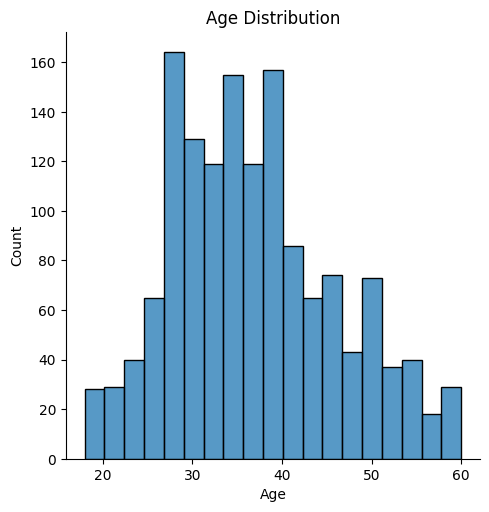

In [144]:
sns.displot(employee_df[dist_col.value])
plt.title(f'{dist_col.value} Distribution')
plt.show()

## Attrition distribution

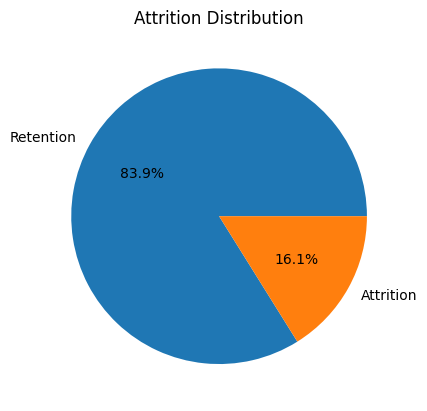

In [146]:
attrition_counts = employee_df['Attrition'].value_counts()
labels = ['Retention', 'Attrition']
plt.pie(attrition_counts, labels=labels, autopct='%1.1f%%')
plt.title('Attrition Distribution')
plt.show()

## Categorical column investigaton

In [150]:
categorical_columns.remove('Attrition')

In [252]:

def categorical_colum_investigaton(col_name):
    f,ax = plt.subplots(1,3, figsize=(18,6))
    employee_df[col_name].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
    employee_df[col_name].value_counts().plot.bar(cmap='Set3',ax=ax[1])
    ax[1].set_title(f'Number of Employee by {col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')
    sns.countplot(x=col_name, hue='Attrition',data=employee_df, ax=ax[2], palette='Set3')
    ax[2].set_title(f'Attrition by {col_name}')
    ax[2].set_xlabel(f'{col_name}')
    ax[2].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')

In [253]:
cat_col = mr.Select(value="Gender", 
                   choices=categorical_columns, 
                   label="Categorical column investigation")

mercury.Select

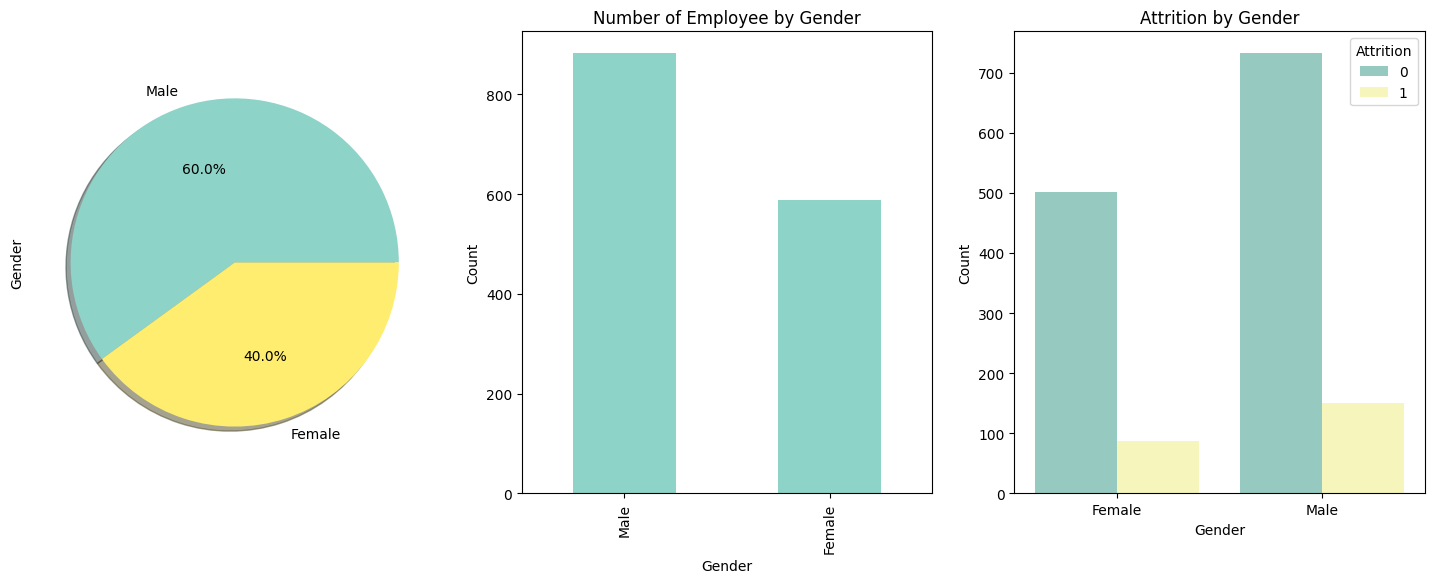

In [254]:
categorical_colum_investigaton(cat_col.value)

## Categorical numerical comparision

In [273]:
def categorical_numerical_comparision(numerical_col, caterical_col1, caterical_col2):
    f,ax = plt.subplots(1,2, figsize=(18,6))
    g1= sns.swarmplot(x=caterical_col1, y=numerical_col,hue='Attrition', data=employee_df, dodge=True, ax=ax[0], palette='Set2')
    ax[0].set_title(f'{numerical_col} vs {caterical_col1} separeted by Attrition')
    g1.set_xticklabels(g1.get_xticklabels(), rotation=45) 

    g2 = sns.swarmplot( x=caterical_col2, y=numerical_col,hue='Attrition', data=employee_df, dodge=True, ax=ax[1], palette='Set2')
    ax[1].set_title(f'{numerical_col} vs {caterical_col2} separeted by Attrition')
    g2.set_xticklabels(g2.get_xticklabels(), rotation=45) 

In [277]:
num_col1 = mr.Select(value="Age", 
                   choices=numerical_columns, 
                   label="Numerical column for categorical numerical comparision")
cat_col1 = mr.Select(value="Gender", 
                   choices=categorical_columns, 
                   label="Categorical column 1 for categorical numerical comparision")
cat_col2 = mr.Select(value="MaritalStatus", 
                   choices=categorical_columns, 
                   label="Categorical column 2 for categorical numerical comparision")

categorical numerical comparision**

mercury.Select

mercury.Select

mercury.Select

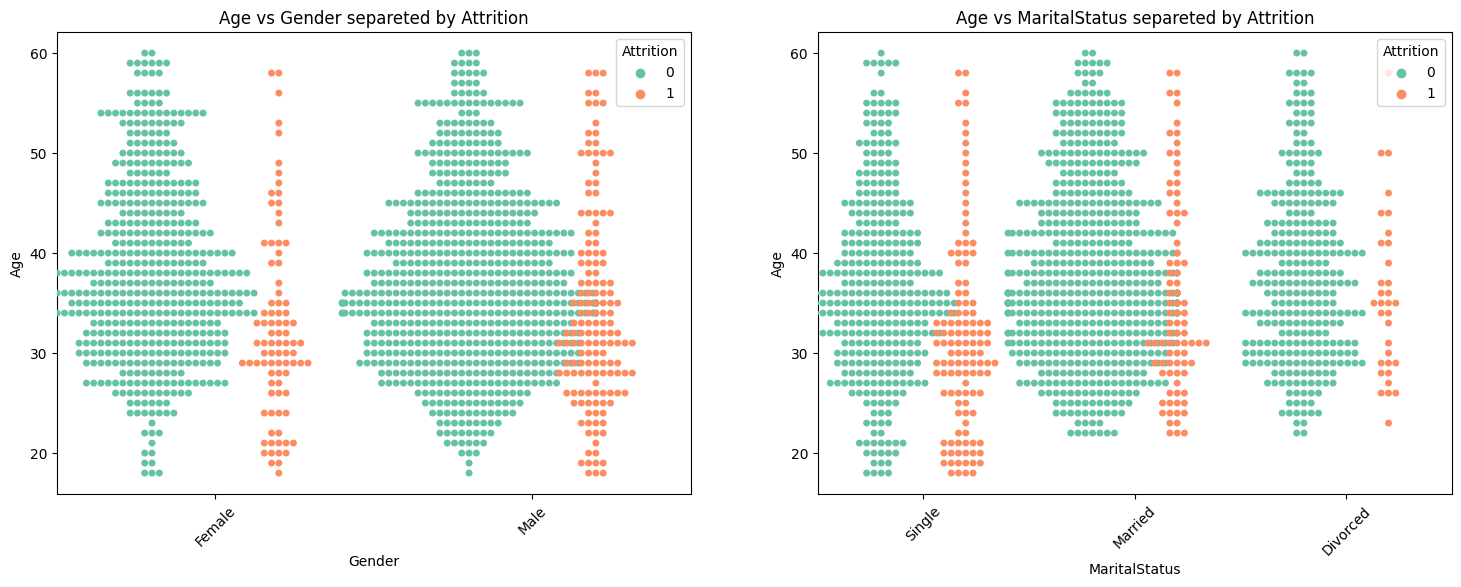

In [275]:
categorical_numerical_comparision(num_col1.value,cat_col1.value,cat_col2.value)